# Assignment 3 - Introduction to Python for Data Science Program
#### **Nama: Ika Nurfitriani**
#### **Kode Peserta: PYTN-KS10-008**

# Short Description of The Assignment
This assignment is a project intended as the **third** assignment in a self-study class at PT Hacktivate Teknologi Indonesia. In this project, we will analyze the Bank Marketing dataset. This assignment is made by taking into account all the assessment rubrics that have been set and will be checked by the teacher of each class.

# Project Overview
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. There are four datasets:
- **bank-additional-full.csv** with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
- **bank-additional.csv** with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
- **bank-full.csv** with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
- **bank.csv** with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

Input variables:

Bank Client Data:
User Details:
   1. `age` (numeric)

   2. `job` : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

   3. `marital` : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

   4. `education` (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

   5. `default`: has credit in default? (categorical: 'no','yes','unknown')

   6.  `housing`: has housing loan? (categorical: 'no','yes','unknown')

   7. `loan`: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:

   8. `contact`: contact communication type (categorical: 'cellular','telephone')

   9. `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

   10. `day_of_week`: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

   11. `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

   12. `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)

   13. `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

   14. `previous`: number of contacts performed before this campaign and for this client (numeric)

   15. `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes:

   16. `emp.var.rate`: employment variation rate - quarterly indicator (numeric)

   17. `cons.price.idx`: consumer price index - monthly indicator (numeric)

   18. `cons.conf.idx`: consumer confidence index - monthly indicator (numeric)

   19. `euribor3m`: euribor 3 month rate - daily indicator (numeric)

   20. `nr.employed`: number of employees - quarterly indicator (numeric)

Output variable (desired target):

   21. `y` - has the client subscribed a term deposit? (binary: 'yes','no')

# A. Import Required Libraries
***
Di tahap ini, saya mengimpor beberapa library yang dibutuhkan.

In [2]:
# Import library yang dibutuhkan untuk preprocessing dan visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Import library yang dibutuhkan untuk modelling
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

# B. Preparation and Exploring Dataset
***
Di tahap ini, data dalam dataset akan melalui berbagai proses pengecekan untuk memastikan bahwa data dapat dilakukan analisa sederhana menggunakan visualisasi dan siap untuk dilakukan preprocessing sebelum modeling.

## 1. Data Loading

In [3]:
# Open data
df_bank = pd.read_csv("bank-additional-full.csv", sep=';')

# Menampilkan 5 data pertama dan 5 data terakhir
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
# Melihat informasi dimensi dari dataset
rows, columns = df_bank.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
41188 baris
21 kolom


In [5]:
# Melihat ringkasan tipe data setiap kolom
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Melihat range index dataset
df_bank.index

RangeIndex(start=0, stop=41188, step=1)

In [7]:
# Melihat daftar indeks dataset
df_bank.index.values

array([    0,     1,     2, ..., 41185, 41186, 41187], dtype=int64)

In [8]:
# Mengetahui daftar kolom yang ada dalam dataset
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
# Mengelompokkan atribut berdasarkan tipe datanya
numerical_columns = list(df_bank.select_dtypes(include=['int64']).columns.values) + list(df_bank.select_dtypes(include=['float64']).columns.values)
categorical_columns = list(df_bank.select_dtypes(include=['object']))

In [10]:
# Mencetak kolom numerik dan kategori
print("Kolom Numerik: ", numerical_columns)
print("\nKolom Kategorik: ", categorical_columns)

Kolom Numerik:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Kolom Kategorik:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [11]:
# Melihat deskriptif statistik untuk kolom numerik
df_bank[numerical_columns].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## 2. Data Cleaning

In [12]:
# Memeriksa kolom kategori dan jumlah masing-masing di setiap fitur
print("Job:",df_bank.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",df_bank.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",df_bank.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",df_bank.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",df_bank.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",df_bank.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",df_bank.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",df_bank.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",df_bank.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",df_bank.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",df_bank.y.value_counts(),sep = '\n')
print("-"*40)

Job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------------------
Marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
----------------------------------------
Education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------------------
Default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------------
Housing loan:
yes        21576
no         18622
unknown      

In [13]:
# Melihat jumlah data yang unik
df_bank.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [14]:
# Melihat unstandard missing values pada kolom kategori
df_bank[categorical_columns].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [15]:
# Melihat unstandard missing values pada kolom numerik
df_bank[numerical_columns].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [16]:
# Mengganti nilai 999 pada pdays 
df_bank['pdays'].replace(999, 0, inplace=True)

In [17]:
# Melihat apakah terdapat missing values
print("Jumlah missing values pada kolom kategori =", df_bank[categorical_columns].isnull().sum().sum())
print("Jumlah missing values pada kolom numerik =", df_bank[numerical_columns].isnull().sum().sum())
print("Total missing values semua kolom =", df_bank.isnull().sum().sum())

Jumlah missing values pada kolom kategori = 0
Jumlah missing values pada kolom numerik = 0
Total missing values semua kolom = 0


In [19]:
# Melihat apakah terdapat duplicated data
print("Jumlah duplicated data =", df_bank.duplicated().sum())

Jumlah duplicated data = 12


In [20]:
# Menghapus data duplikat
df_bank.drop_duplicates(subset=df_bank.columns, keep='first', inplace=True)

In [21]:
# Melihat kembali informasi dimensi dari dataset setelah hapus duplicated data
rows, columns = df_bank.shape
print("Dimensi data:")
print(rows, "baris")
print(columns, "kolom")

Dimensi data:
41176 baris
21 kolom


In [22]:
# Mengganti nama kolom 
df_bank.rename(columns={
    'default':'credit default',
    'pdays':'number of days passed',
    'emp.var.rate':'employment variation rate',
    'cons.price.idx':'consumer price index',
    'cons.conf.idx':'consumer confidence index',
    'euribor3m':'euribor 3 month rate',
    'nr.employed':'number of employees',
    'y':'deposit',
}, inplace=True)

# Melihat 5 data pertama dan 5 data terakhir
df_bank

,age,job,marital,education,credit default,housing,loan,contact,month,day_of_week,...,campaign,number of days passed,previous,poutcome,employment variation rate,consumer price index,consumer confidence index,euribor 3 month rate,number of employees,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### KESIMPULAN ANALISIS
Pada tahapan di atas saya mengecek missing values, mengecek data duplikat, mengganti nilai 999 pada pdays serta mengganti nama kolom.

# C. EDA (Data Visualization)
***
Di tahap ini, saya akan melakukan analisa sederhana dengan menggunakan visualisasi.<br>
**Question:**
1. Berapa perbandingan dan presentase dari banyaknya client yang berlangganan deposito dan yang tidak berlangganan deposito?
2. Bagaimana visualisasi dari kolom numerik dengan menggunakan histogram?
3. Berapa jumlah orang berdasarkan pekerjaan dan tingkat pendidikan?

**Answer Question 1**

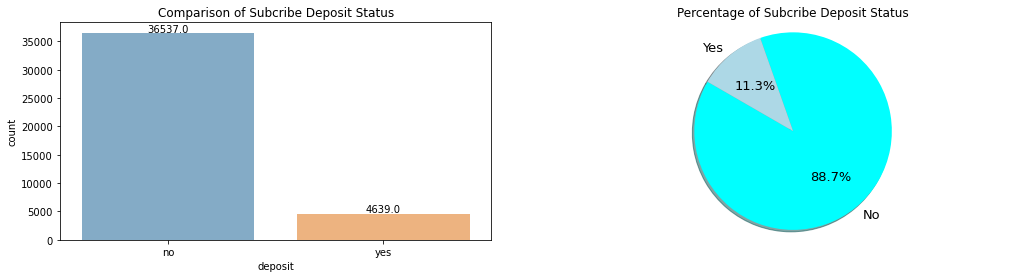

In [23]:
# Membuat 2 grafik secara bersamaan dengan subplot
# Membuat bar plot untuk melihat perbandingan banyaknya client yang berlangganan deposito dengan yang tidak
plt.rcParams['figure.figsize']=(17,4)
plt.subplot(121)
plt.title("Comparison of Subcribe Deposit Status")
ax = sns.countplot(x='deposit', data=df_bank, alpha=0.6)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,4), textcoords='offset points')

# Membuat pie chart untuk melihat presentase banyaknya client yang berlangganan deposito dengan yang tidak
plt.subplot(122)
plt.title("Percentage of Subcribe Deposit Status")
subscribed_values_count = df_bank['deposit'].value_counts()
subscribed_size = subscribed_values_count.values.tolist()
subscribed_labels = 'No', 'Yes'
colors=['aqua', 'lightblue']
pcs, texts, autotexts = plt.pie(subscribed_size, labels=subscribed_labels, colors=colors,
                             autopct='%1.1f%%', shadow=True, startangle=150)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(13)
    autotext.set_fontsize(13)

plt.axis('equal')
plt.show()

**Answer Question 2**

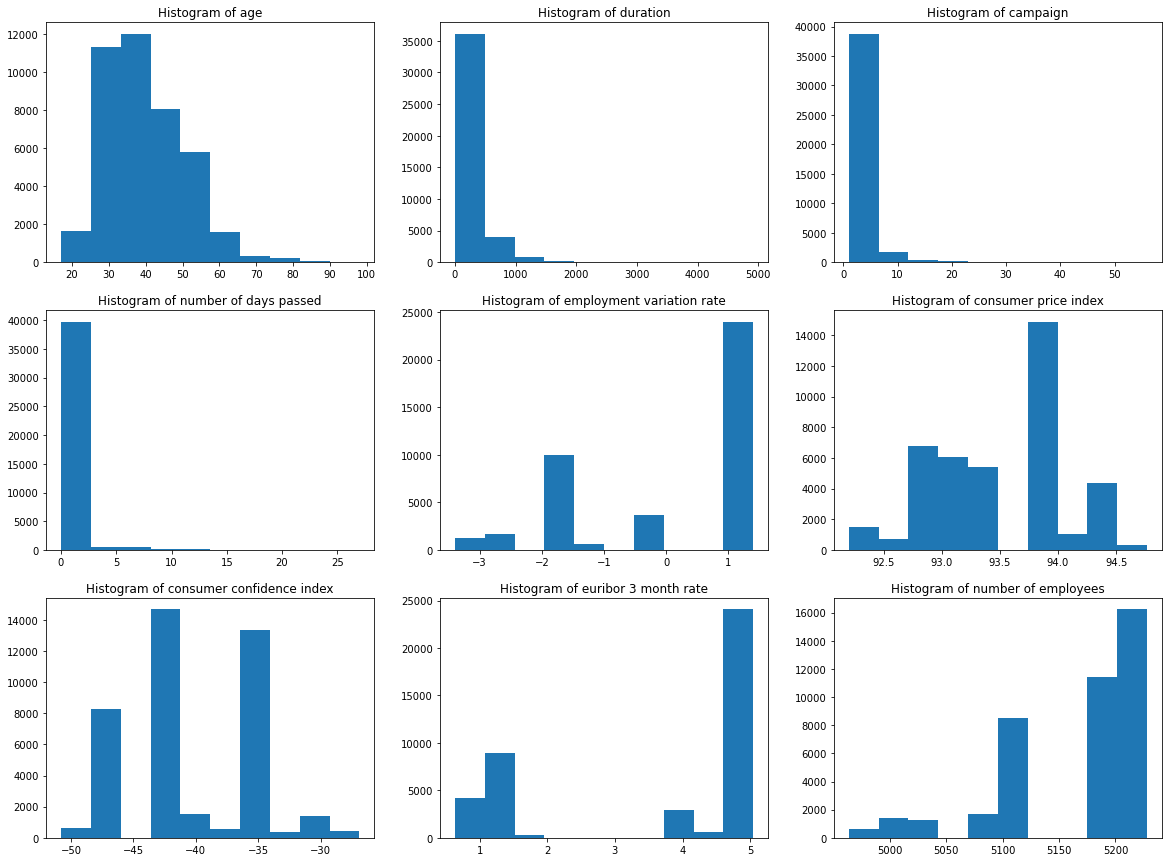

In [24]:
# Memisahkan kolom numerik
numerical_columns = ['age','duration','campaign','number of days passed','employment variation rate','consumer price index','consumer confidence index','euribor 3 month rate','number of employees']

# Membuat histogram untuk kolom numerik
fig, ax = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20,15))
count = 0
for num_col in numerical_columns:
    ax_x = count//3
    ax_y = count%3
    
    ax[ax_x, ax_y].hist(df_bank[num_col])
    ax[ax_x, ax_y].set_title(f"Histogram of {num_col}")
    count+=1
plt.show()

**Answer Question 3**

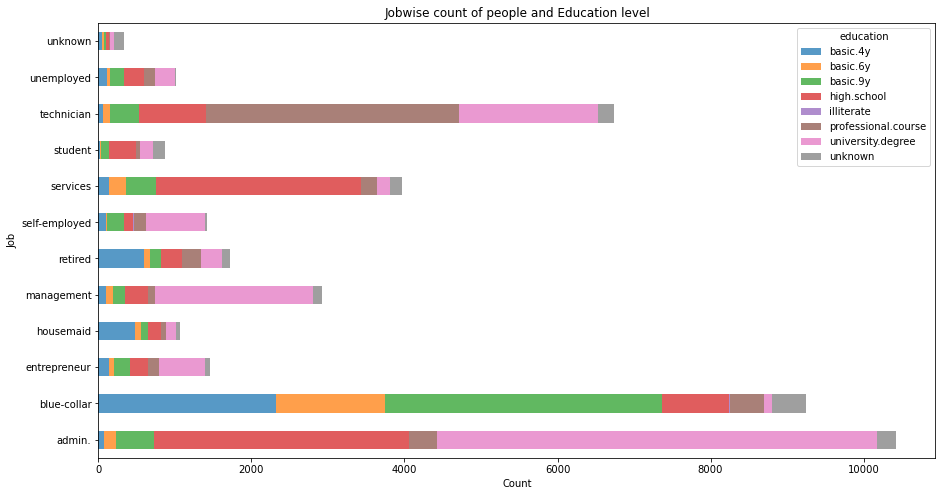

In [25]:
# Membuat pivot table untuk melihat jumlah orang berdasarkan pekerjaan dan tingkat pendidikan
df_pivot = pd.pivot_table(df_bank,columns='education', index='job', aggfunc='count', values='age')
df_pivot.plot(kind='barh', stacked=True , figsize=(15,8), alpha=0.75)
plt.title('Jobwise count of people and Education level')
plt.ylabel('Job')
plt.xlabel('Count')
plt.show()

### KESIMPULAN/ANALISIS JAWABAN:<br>
Berikut kesimpulan yang didapatkan dari hasil visualisasi di atas:
1. Terdapat 36537 client yang berlangganan deposito dan 4639 client yang tidak berlangganan deposito dengan presentase masing-masing ialah 11.3% dan 88.7%.
2. Untuk hasil visualisasi dari kolom numerik, saya akan mengambil kesimpulan dari kolom Age atau umur. Berdasarkan umur, client dengan umur 40-an adalah terbanyak pertama, disusul dengan client umur 30-an di tempat kedua.
3. Jumlah orang dengan pekerjaan sebagai admin dan jumlah orang dengan tingkat pendidikan gelar universitas menjadi yang terbanyak di kelompoknya masing-masing.

# D. Prepocessing Data
***
Di tahap ini, saya akan memproses data untuk menentukan feature dan target serta membagi data train dan data test sebelum dilakukan modelling.

### Encoding kolom kategori

In [26]:
# Melakukan encoder pada kolom kategori
df_bank['job'] = LabelEncoder().fit_transform(df_bank['job'])
df_bank['marital'] = LabelEncoder().fit_transform(df_bank['marital'])
df_bank['education'] = LabelEncoder().fit_transform(df_bank['education'])
df_bank['credit default'] = LabelEncoder().fit_transform(df_bank['credit default'])
df_bank['housing'] = LabelEncoder().fit_transform(df_bank['housing'])
df_bank['loan'] = LabelEncoder().fit_transform(df_bank['loan'])
df_bank['contact'] = LabelEncoder().fit_transform(df_bank['contact'])
df_bank['month'] = LabelEncoder().fit_transform(df_bank['month'])
df_bank['day_of_week'] = LabelEncoder().fit_transform(df_bank['day_of_week'])
df_bank['poutcome'] = LabelEncoder().fit_transform(df_bank['poutcome'])
df_bank['deposit'] = LabelEncoder().fit_transform(df_bank['deposit'])

# Menampilkan 5 data pertama setelah encoding
df_bank.head()

,age,job,marital,education,credit default,housing,loan,contact,month,day_of_week,...,campaign,number of days passed,previous,poutcome,employment variation rate,consumer price index,consumer confidence index,euribor 3 month rate,number of employees,deposit
0,56,3,1,0,0,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [27]:
# Mengecek tipe data setelah encoding
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        41176 non-null  int64  
 1   job                        41176 non-null  int32  
 2   marital                    41176 non-null  int32  
 3   education                  41176 non-null  int32  
 4   credit default             41176 non-null  int32  
 5   housing                    41176 non-null  int32  
 6   loan                       41176 non-null  int32  
 7   contact                    41176 non-null  int32  
 8   month                      41176 non-null  int32  
 9   day_of_week                41176 non-null  int32  
 10  duration                   41176 non-null  int64  
 11  campaign                   41176 non-null  int64  
 12  number of days passed      41176 non-null  int64  
 13  previous                   41176 non-null  int

### Pilih feature dan target

In [28]:
# Memilih feature sebagai X
X = df_bank.drop('deposit', axis=1)
# Memilih target sebagai y
y = df_bank['deposit']

### Splitting dan Scaling data

In [29]:
# Splitting data menjadi 70% data train dan 30% data test
X_train, X_test, y_train, y_test = train_test_split(X , y, shuffle = True, test_size = 0.3, random_state = 45)

# Scaling data
scaler = StandardScaler()
scaler.fit(X_train)

# Transformasi X nya
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mengetahui dimensi data train dan data test
print('Dimensi feature data train =', X_train.shape)
print('Dimensi target data train =', y_train.shape)
print('Dimensi feature data test =', X_test.shape)
print('Dimensi target data test =', y_test.shape)

Dimensi feature data train = (28823, 20)
Dimensi target data train = (28823,)
Dimensi feature data test = (12353, 20)
Dimensi target data test = (12353,)


### KESIMPULAN ANALISIS
Pada tahapan di atas saya melakukan encoding pada kolom kategori, memilih feature dan target, melakukan splitting data menjadi 70% data train dan 30% data test, serta melakukan scaling data. Lalu diperoleh data train sebanyak 28823 baris dan data test 12353 baris.

# E. Modelling 
***
Di tahap ini, saya akan melakukan modeling menggunakan algoritma Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Decision Tree, Random Forest dan Naive Bayes.

## 1. Logistic Regression
Di tahap ini, saya akan melakukan implementasi Logistic Regression dan Confusion Matrix menggunakan scikit-learn.

In [30]:
# Implementasi Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

### Evaluasi model

In [31]:
# Evaluasi model
y_pred1 = logreg.predict(X_test)
print("Logistic Regression")
print("Accuracy score :", accuracy_score(y_test, y_pred1))

# Implementasi Confusion Matrix
matrix1=confusion_matrix(y_test, y_pred1)
print("Confusion Matrix :\n", matrix1)

# Melihat hasil akurasi dengan Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred1))

Logistic Regression
Accuracy score : 0.9085242451226423
Confusion Matrix :
 [[10733   263]
 [  867   490]]
Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     10996
           1       0.65      0.36      0.46      1357

    accuracy                           0.91     12353
   macro avg       0.79      0.67      0.71     12353
weighted avg       0.90      0.91      0.90     12353



### Heatmap dari Confusion Matrix

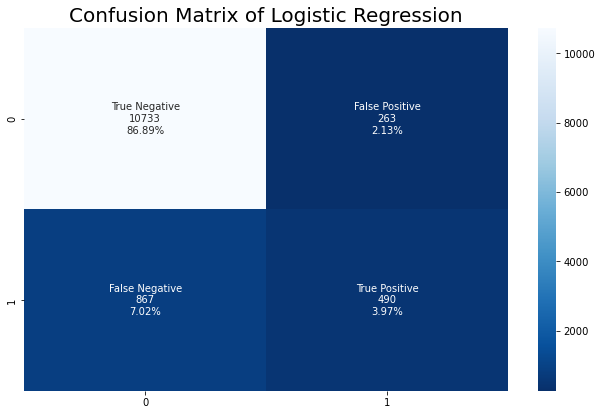

In [32]:
# Membuat labels untuk heatmap
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in matrix1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix1.flatten()/np.sum(matrix1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Membuat heatmap dari Confusion Matrix
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix1, annot=labels, fmt='', cmap='Blues_r')
plt.title("Confusion Matrix of Logistic Regression", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

### KESIMPULAN ANALISIS
Berdasarkan hasil implementasi Logistic Regression di atas didapatkan bahwa akurasi dengan accuracy score ialah 90.9%. Kemudian dari confusion matrix didapatkan bahwa prediksi True Negative lebih banyak dibandingkan yang lain, lalu disusul oleh prediksi False Negative, kemudian prediksi True Positive dan yang terakhir prediksi False Positive. Kemudian untuk hasil classification report, akurasi yang didapatkan ialah 91%.

## 2. K-Nearest Neighbors (KNN)
Di tahap ini, saya akan melakukan implementasi K-Nearest Neighbors (KNN) dan Confusion Matrix menggunakan scikit-learn.

In [33]:
# Implementasi K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Evaluasi model

In [34]:
# Evaluasi model
y_pred2 = knn.predict(X_test)
print("K-Nearest Neighbors")
print("Accuracy score :", accuracy_score(y_test, y_pred2))

# Implementasi Confusion Matrix
matrix2=confusion_matrix(y_test, y_pred2)
print("Confusion Matrix :\n", matrix2)

# Melihat hasil akurasi dengan Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred2))

K-Nearest Neighbors
Accuracy score : 0.9041528373674411
Confusion Matrix :
 [[10534   462]
 [  722   635]]
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     10996
           1       0.58      0.47      0.52      1357

    accuracy                           0.90     12353
   macro avg       0.76      0.71      0.73     12353
weighted avg       0.90      0.90      0.90     12353



### Heatmap dari Confusion Matrix

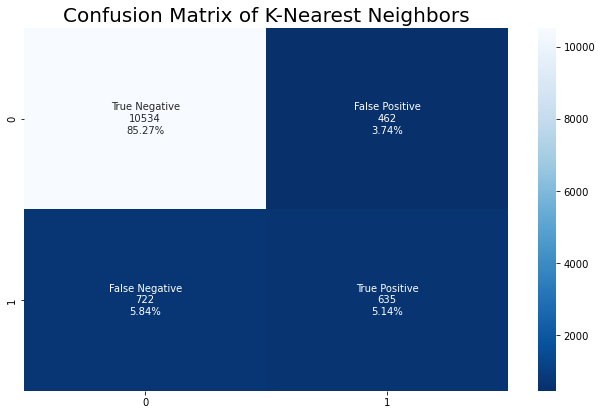

In [35]:
# Membuat labels untuk heatmap
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in matrix2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix2.flatten()/np.sum(matrix2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Membuat heatmap dari Confusion Matrix
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix2, annot=labels, fmt='', cmap='Blues_r')
plt.title("Confusion Matrix of K-Nearest Neighbors", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

### KESIMPULAN ANALISIS
Berdasarkan hasil implementasi K-Nearest Neighbors (KNN) di atas didapatkan bahwa akurasi dengan accuracy score ialah 90.4%. Kemudian dari confusion matrix didapatkan bahwa prediksi True Negative lebih banyak dibandingkan yang lain, lalu disusul oleh prediksi False Negative, kemudian prediksi True Positive dan yang terakhir prediksi False Positive. Kemudian untuk hasil classification report, akurasi yang didapatkan ialah 90%.

## 3. Support Vector Machine (SVM)
Di tahap ini, saya akan melakukan implementasi Support Vector Machine (SVM) dan Confusion Matrix menggunakan scikit-learn.

In [36]:
# Implementasi Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)

SVC()

### Evaluasi model

In [37]:
# Evaluasi model
y_pred3 = svm.predict(X_test)
print("Support Vector Machine")
print("Accuracy score :", accuracy_score(y_test, y_pred3))

# Implementasi Confusion Matrix
matrix3=confusion_matrix(y_test, y_pred3)
print("Confusion Matrix :\n", matrix3)

# Melihat hasil akurasi dengan Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred3))

Support Vector Machine
Accuracy score : 0.8922528940338379
Confusion Matrix :
 [[10974    22]
 [ 1309    48]]
Classification Report :
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     10996
           1       0.69      0.04      0.07      1357

    accuracy                           0.89     12353
   macro avg       0.79      0.52      0.51     12353
weighted avg       0.87      0.89      0.85     12353



### Heatmap dari Confusion Matrix

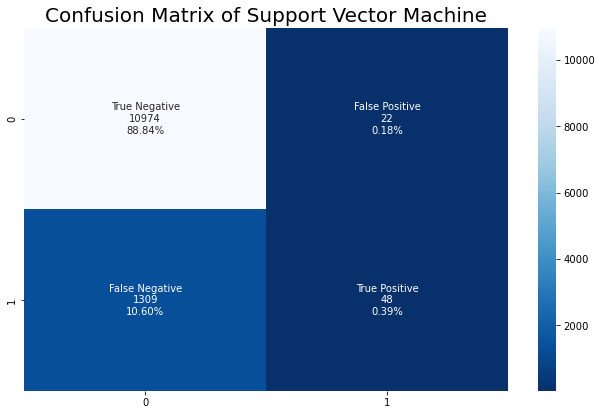

In [38]:
# Membuat labels untuk heatmap
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in matrix3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix3.flatten()/np.sum(matrix3)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Membuat heatmap dari Confusion Matrix
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix3, annot=labels, fmt='', cmap='Blues_r')
plt.title("Confusion Matrix of Support Vector Machine", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

### KESIMPULAN ANALISIS
Berdasarkan hasil implementasi Support Vector Machine (SVM) di atas didapatkan bahwa akurasi dengan accuracy score ialah 89.2%. Kemudian dari confusion matrix didapatkan bahwa prediksi True Negative lebih banyak dibandingkan yang lain, lalu disusul oleh prediksi False Negative, kemudian prediksi True Positive dan yang terakhir prediksi False Positive.. 
Kemudian untuk hasil classification report, akurasi yang didapatkan ialah 89%.

## 4. Decision Tree
Di tahap ini, saya akan melakukan implementasi Decision Tree dan Confusion Matrix menggunakan scikit-learn.

In [39]:
# Implementasi Decision Tree
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)

DecisionTreeClassifier()

### Evaluasi model

In [40]:
# Evaluasi model
y_pred4 = dectree.predict(X_test)
print("Decision Tree")
print("Accuracy score :", accuracy_score(y_test, y_pred4))

# Implementasi Confusion Matrix
matrix4=confusion_matrix(y_test, y_pred4)
print("Confusion Matrix :\n", matrix4)

# Melihat hasil akurasi dengan Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred4))

Decision Tree
Accuracy score : 0.8916862300655711
Confusion Matrix :
 [[10310   686]
 [  652   705]]
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     10996
           1       0.51      0.52      0.51      1357

    accuracy                           0.89     12353
   macro avg       0.72      0.73      0.73     12353
weighted avg       0.89      0.89      0.89     12353



### Heatmap dari Confusion Matrix

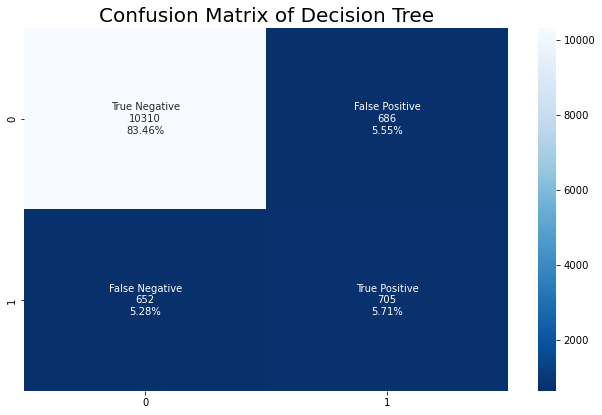

In [41]:
# Membuat labels untuk heatmap
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in matrix4.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix4.flatten()/np.sum(matrix4)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Membuat heatmap dari Confusion Matrix
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix4, annot=labels, fmt='', cmap='Blues_r')
plt.title("Confusion Matrix of Decision Tree", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

### KESIMPULAN ANALISIS
Berdasarkan hasil implementasi Decision Tree di atas didapatkan bahwa akurasi dengan accuracy score ialah 89.2%. Kemudian dari confusion matrix didapatkan bahwa prediksi True Negative lebih banyak dibandingkan yang lain, lalu disusul oleh prediksi False Negative, kemudian prediksi True Positive dan yang terakhir prediksi False Positive. Kemudian untuk hasil classification report, akurasi yang didapatkan ialah 89%.

## 5. Random Forest
Di tahap ini, saya akan melakukan implementasi Random Forest dan Confusion Matrix menggunakan scikit-learn.

In [42]:
# Implementasi Random Forest
ranfor = RandomForestClassifier()
ranfor.fit(X_train, y_train)

RandomForestClassifier()

### Evaluasi model

In [43]:
# Evaluasi model
y_pred5 = ranfor.predict(X_test)
print("Random Forest")
print("Accuracy score :", accuracy_score(y_test, y_pred5))

# Implementasi Confusion Matrix
matrix5=confusion_matrix(y_test, y_pred5)
print("Confusion Matrix :\n", matrix5)

# Melihat hasil akurasi dengan Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred5))

Random Forest
Accuracy score : 0.918724196551445
Confusion Matrix :
 [[10652   344]
 [  660   697]]
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10996
           1       0.67      0.51      0.58      1357

    accuracy                           0.92     12353
   macro avg       0.81      0.74      0.77     12353
weighted avg       0.91      0.92      0.91     12353



### Heatmap dari Confusion Matrix

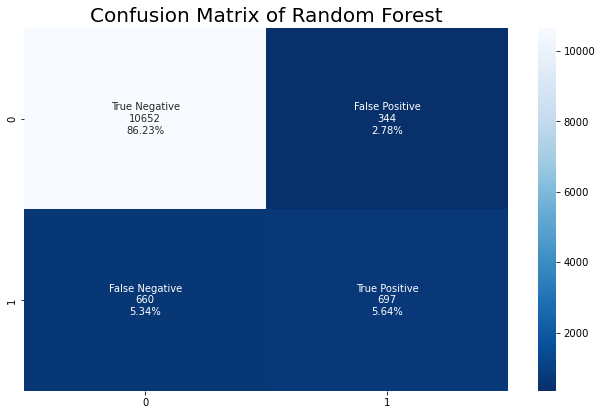

In [44]:
# Membuat labels untuk heatmap
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in matrix5.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix5.flatten()/np.sum(matrix5)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Membuat heatmap dari Confusion Matrix
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix5, annot=labels, fmt='', cmap='Blues_r')
plt.title("Confusion Matrix of Random Forest", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

### KESIMPULAN ANALISIS
Berdasarkan hasil implementasi Random Forest di atas didapatkan bahwa akurasi dengan accuracy score ialah 91.9%. Kemudian dari confusion matrix didapatkan bahwa prediksi True Negative lebih banyak dibandingkan yang lain, lalu disusul oleh prediksi False Negative, kemudian prediksi True Positive dan yang terakhir prediksi False Positive. Kemudian untuk hasil classification report, akurasi yang didapatkan ialah 92%.

## 6. Naive Bayes
Di tahap ini, saya akan melakukan implementasi Naive Bayes dan Confusion Matrix menggunakan scikit-learn.

In [45]:
# Implementasi Naive Bayes
naibay = GaussianNB()
naibay.fit(X_train, y_train)

GaussianNB()

### Evaluasi model

In [46]:
# Evaluasi model
y_pred6 = naibay.predict(X_test)
print("Naive Bayes")
print("Accuracy score :", accuracy_score(y_test, y_pred6))

# Implementasi Confusion Matrix
matrix6=confusion_matrix(y_test, y_pred6)
print("Confusion Matrix :\n", matrix6)

# Melihat hasil akurasi dengan Classification Report
print("Classification Report :\n", classification_report(y_test, y_pred6))

Naive Bayes
Accuracy score : 0.8448959766858253
Confusion Matrix :
 [[9630 1366]
 [ 550  807]]
Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.88      0.91     10996
           1       0.37      0.59      0.46      1357

    accuracy                           0.84     12353
   macro avg       0.66      0.74      0.68     12353
weighted avg       0.88      0.84      0.86     12353



### Heatmap dari Confusion Matrix

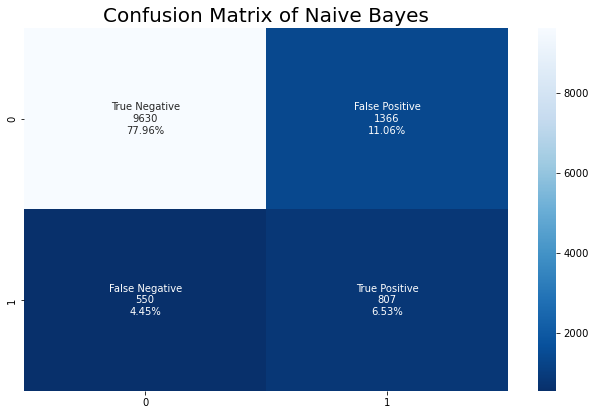

In [47]:
# Membuat labels untuk heatmap
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in matrix6.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix6.flatten()/np.sum(matrix6)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Membuat heatmap dari Confusion Matrix
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(matrix6, annot=labels, fmt='', cmap='Blues_r')
plt.title("Confusion Matrix of Naive Bayes", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
plt.show()

### KESIMPULAN ANALISIS
Berdasarkan hasil implementasi Naive Bayes di atas didapatkan bahwa akurasi dengan accuracy score ialah 84.5%. Kemudian dari confusion matrix didapatkan bahwa prediksi True Negative lebih banyak dibandingkan yang lain, lalu disusul oleh prediksi False Negative, kemudian prediksi True Positive dan yang terakhir prediksi False Positive. Kemudian untuk hasil classification report, akurasi yang didapatkan ialah 84%.

# F. Algorithm Analysis
***

In [48]:
# Membandingkan hasil akurasi dari semua model
print("--- Hasil Akurasi dari Semua Model ---")
print("Logistic Regression :", accuracy_score(y_test, y_pred1))
print("K-Nearest Neighbors (KNN) :", accuracy_score(y_test, y_pred2))
print("Support Vector Machine (SVM) :", accuracy_score(y_test, y_pred3))
print("Decision Tree :", accuracy_score(y_test, y_pred4))
print("Random Forest :", accuracy_score(y_test, y_pred5))
print("Naive Bayes :", accuracy_score(y_test, y_pred6))

--- Hasil Akurasi dari Semua Model ---
Logistic Regression : 0.9085242451226423
K-Nearest Neighbors (KNN) : 0.9041528373674411
Support Vector Machine (SVM) : 0.8922528940338379
Decision Tree : 0.8916862300655711
Random Forest : 0.918724196551445
Naive Bayes : 0.8448959766858253


Pada hasil keseluruhan implementasi model di atas, implementasi dengan Random Forest memiliki skor akurasi yang paling tinggi yaitu **91.9%** atau 92%. Sedangkan implementasi dengan Naive Bayes memiliki skor akurasi yang paling rendah yaitu **84.5%**. Karena itu, saya memilih algoritma **Random Forest** untuk membuat model yang memprediksi apakah client akan berlangganan deposito atau tidak (yes/no).